#Langkah 0 - Import Library

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Langkah 1 - Membuat Dataset Sintentis
Kali ini kita akan membuat data sintentis untuk tujuan pembelajaran. Data yang akan kita buat akan berbentuk spiral untuk menyimulasikan kondisi non linear.

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)

Lakukan proses plotting data untuk mengetahui hasil dataset yang telah dibuat.



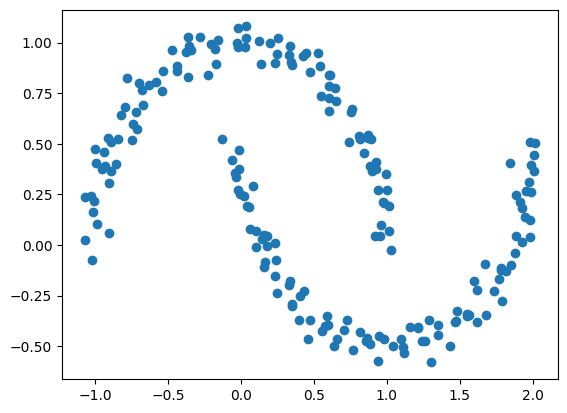

In [3]:
plt.scatter(X[:, 0], X[:, 1])

#Langkah 2 - Klasterisasi dengan K-Means
Buat model KMeans dan lakukan plotting ulang hasil klasterisasi



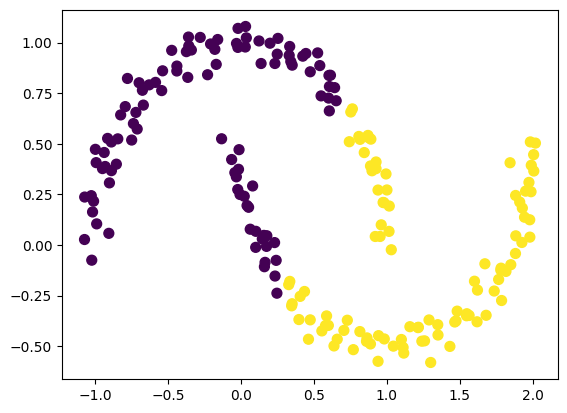

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(2, random_state=0)
cluster = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster, s=50, cmap='viridis')

Terdapat beberapa data yang tidak terklasterisasi secara tepat. Anda dapat dengan mudah membayangkan garis imager linear yang digunakan untuk memisahkan 2 cluster data. Lakukan evaluasi lebih lanjut dengan menggunakan silhouette coefficient.

In [5]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster))

0.49215648268306905


Nilai ini menunjukkan bahwa data tidak terklasterisasi dengan cukup baik.



#Langkah 3 - Klasterisasi dengan DBSCAN
Selanjutnya, kita akan melakukan klasterisasi dengan DBSCAN. Ingat, DBSCAN sangat sensitif terhadap parameter epsilon dan minimal sampel!

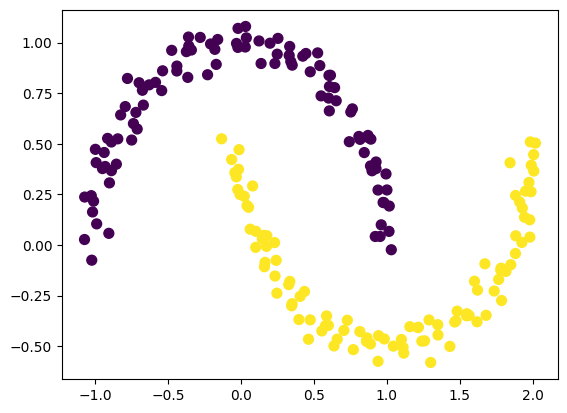

In [6]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=2)
cluster_db = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster_db, s=50, cmap='viridis')

In [7]:
'''
Berdasarkan scatterplot, data dapat terklasterisasi dengan sangat baik.
Untuk memastikannya, kita perlu melakukan evaluasi kembali dengan silhouette score.
'''
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster_db))

# Hasil 0.32585318950197517

0.32585318950197517


Hasil silhouette score menunjukkan hasil yang tidak optimal. Padahal cluster terbentuk dengan baik secara visual. Mengapa demikian? Silhouette coefficient berasumsi cluster dapat terpisah dengan baik dalam bentuk linier, sehingga jika bentuknya distribusi data acak, evaluasi silhouette coefficient tidak dapat bekerja dengan baik. Lalu evaluasi apa yang bisa kita lakukan? Secara sederhana,

Prosentase data noise

Inspeksi visual

Secara metric dapat menggunakan,

1. Davies-Bouldin Index (DBI) --> fokus pada separasi indeks, semakin kecil semakin baik, rentang 0 hingga tak hingga.

In [8]:
from sklearn.metrics import davies_bouldin_score

# Compute and print Davies-Bouldin Index
db = davies_bouldin_score(X, cluster_db)

print(f"Davies-Bouldin Index: {db}")

# Hasilnya
# Davies-Bouldin Index: 1.1622685374061352

Davies-Bouldin Index: 1.1622685374061352
